In [1]:
import pandas as pd 
from pandas import Series
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

import pmdarima as pm
from pmdarima import auto_arima 
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#Importing data
Beijing = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/BeijingPM20100101_20151231.csv")

In [3]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec'], 
               axis=1,
              inplace=True)
#Beijing.sum()

In [4]:
Beijing.dropna(axis=0, how="any",inplace=True)

In [5]:
# from datetime import datetime
Beijing['Time'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str)+" "+Beijing['hour'].map(str)+":00:00")
#Beijing

In [6]:
#Beijing.groupby(['year']).size()

In [7]:
by_hour = Beijing.groupby(['Time']).mean()
#by_hour

In [8]:
by_hour.index = pd.to_datetime(by_hour.index, 
                             format='%d-%m-%Y %H:%M:%S')
by_hour = by_hour.set_index(by_hour.index).asfreq('H')
by_hour = by_hour.fillna(method='ffill')
#by_hour.index

In [9]:
by_hour['Time'] = by_hour.index
by_hour

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2010-01-01 23:00:00,24.0,2010.0,1.0,1.0,23.0,129.0,-17.0,41.0,1020.0,-5.0,0.89,2010-01-01 23:00:00
2010-01-02 00:00:00,25.0,2010.0,1.0,2.0,0.0,148.0,-16.0,38.0,1020.0,-4.0,1.79,2010-01-02 00:00:00
2010-01-02 01:00:00,26.0,2010.0,1.0,2.0,1.0,159.0,-15.0,42.0,1020.0,-4.0,2.68,2010-01-02 01:00:00
2010-01-02 02:00:00,27.0,2010.0,1.0,2.0,2.0,181.0,-11.0,63.5,1021.0,-5.0,3.57,2010-01-02 02:00:00
2010-01-02 03:00:00,28.0,2010.0,1.0,2.0,3.0,138.0,-7.0,85.0,1022.0,-5.0,5.36,2010-01-02 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580.0,2015.0,12.0,31.0,19.0,133.0,-8.0,68.0,1031.0,-3.0,7.14,2015-12-31 19:00:00
2015-12-31 20:00:00,52581.0,2015.0,12.0,31.0,20.0,169.0,-8.0,63.0,1030.0,-2.0,8.03,2015-12-31 20:00:00
2015-12-31 21:00:00,52582.0,2015.0,12.0,31.0,21.0,203.0,-10.0,73.0,1030.0,-6.0,0.89,2015-12-31 21:00:00


In [10]:
data_13 = by_hour[(by_hour['Time'] >=pd.to_datetime('20130101030000')) & (by_hour['Time'] <= pd.to_datetime('20140601030000'))]

In [11]:
len(data_13)

12385

In [12]:
data_13 = data_13.set_index(data_13.index).asfreq('d')
data_13
#data_1314.index

,No,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,Time
Time,,,,,,,,,,,,
2013-01-01 03:00:00,26308.0,2013.0,1.0,1.0,3.0,16.0,-14.0,72.0,1018.0,-10.0,14.75,2013-01-01 03:00:00
2013-01-02 03:00:00,26332.0,2013.0,1.0,2.0,3.0,17.0,-28.0,25.0,1035.0,-12.0,156.03,2013-01-02 03:00:00
2013-01-03 03:00:00,26356.0,2013.0,1.0,3.0,3.0,20.0,-28.0,25.0,1046.0,-12.0,375.07,2013-01-03 03:00:00
2013-01-04 03:00:00,26380.0,2013.0,1.0,4.0,3.0,56.0,-22.0,65.0,1038.0,-17.0,20.13,2013-01-04 03:00:00
2013-01-05 03:00:00,26404.0,2013.0,1.0,5.0,3.0,78.0,-22.0,50.0,1028.0,-14.0,3.13,2013-01-05 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28 03:00:00,38596.0,2014.0,5.0,28.0,3.0,27.0,6.0,39.0,1002.0,20.0,1.79,2014-05-28 03:00:00
2014-05-29 03:00:00,38620.0,2014.0,5.0,29.0,3.0,44.0,12.0,56.0,997.0,21.0,2.67,2014-05-29 03:00:00
2014-05-30 03:00:00,38644.0,2014.0,5.0,30.0,3.0,113.0,13.0,53.0,1003.0,23.0,1.79,2014-05-30 03:00:00


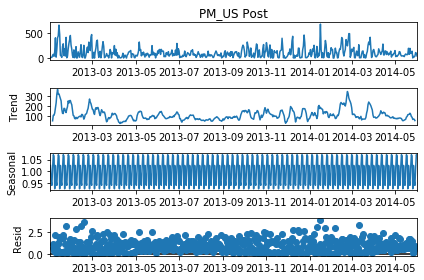

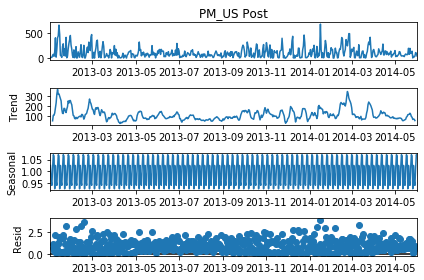

In [13]:
result = seasonal_decompose(data_13['PM_US Post'],  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()

In [14]:
# Split data into train / test sets 
##train = data_13['PM_US Post'].iloc[:len(data_13)-1000] 
##test = data_13['PM_US Post'].iloc[len(data_13)-1000:]

In [15]:
# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(data_13['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 4, max_q = 4, m=7,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise  

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 7) (constant=True); AIC=6217.234, BIC=6229.938, Time=0.516 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=True); AIC=6507.228, BIC=6515.697, Time=0.056 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 7) (constant=True); AIC=6254.179, BIC=6271.117, Time=0.602 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 7) (constant=True); AIC=6114.916, BIC=6131.854, Time=0.647 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 7) (constant=False); AIC=6505.228, BIC=6509.462, Time=0.031 seconds
Fit ARIMA: (0, 0, 0)x(1, 1, 1, 7) (constant=True); AIC=6216.905, BIC=6233.843, Time=0.636 seconds
Near non-invertible roots for order (0, 0, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 0, 0)x(0, 1, 2, 7) (constant=True); A

In [16]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  517
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -3049.710
Date:                           Fri, 10 Apr 2020   AIC                           6109.420
Time:                                   17:05:15   BIC                           6130.592
Sample:                                        0   HQIC                          6117.720
                                           - 517                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0804      0.299     -0.269      0.788      -0.667       0.506
ar.L1          0.2765      0.084      3.277      0.001       0.111       0.442
ma.L1          0.1995      0.093      2.148      0.032       0.017       0.382
ma.S.L7       -0.9958      0.112     -8.929      0.000      -1.214      -0.777
sigma2      8660.8795    962.779      8.996      0.000    6773.867    1.05e+04
===================================================================================
Ljung-Box (Q):                       56.98   Jarque-Bera (JB):               306.65
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.00
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Fit a SARIMAX(1, 0, 1)x(0, 1, 1, 7)on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(data_13['PM_US Post'],  
                order = (1, 0, 1),  
                seasonal_order =(0, 1, 1, 7))

In [18]:
result = model.fit() 

In [19]:
 result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        PM_US Post   No. Observations:                  517
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -3049.776
Date:                           Fri, 10 Apr 2020   AIC                           6107.553
Time:                                   17:05:16   BIC                           6124.490
Sample:                               01-01-2013   HQIC                          6114.193
                                    - 06-01-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2775      0.082      3.388      0.001       0.117       0.438
ma.L1          0.1988      0.093      2.148      0.032       0.017       0.380
ma.S.L7       -0.9994      0.818     -1.222      0.222      -2.603       0.604
sigma2      8632.6611   6975.805      1.238      0.216   -5039.665    2.23e+04
===================================================================================
Ljung-Box (Q):                       55.96   Jarque-Bera (JB):               308.41
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.00
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

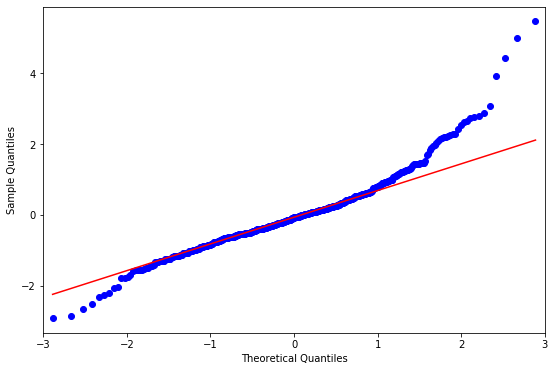

In [20]:
resid = result.resid
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [21]:
len(data_13)

517

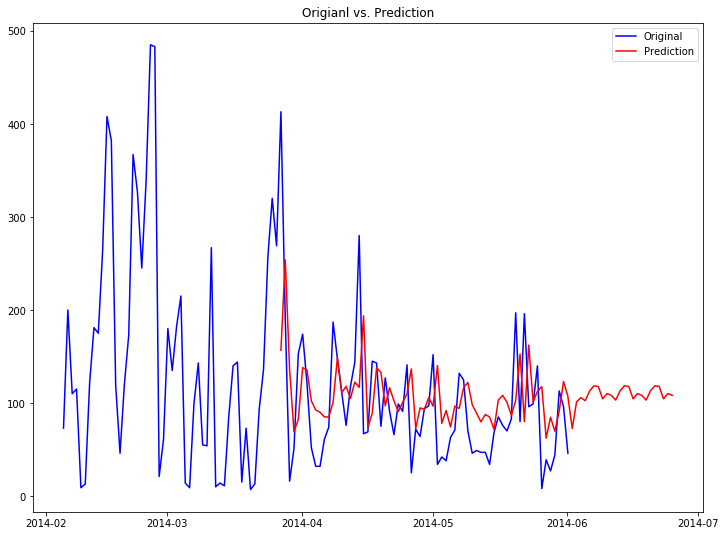

In [22]:
predict_ARMA = result.predict(start = 450, end = 540) 
#print(predict_ARIMA) 

plt.figure(figsize=(12,9)) 
orig = plt.plot(data_13['PM_US Post'][400:], color='blue', label='Original') 
pred = plt.plot(predict_ARMA, color='red', label='Prediction' ) 
plt.legend(loc='best') 
plt.title('Origianl vs. Prediction') 
plt.show(block=False) 